In [9]:
import pandas as pd

df = pd.read_csv("genotype_dataset.csv")
df.head()


,PatientID,Genotype,Phenotype,Treatment_Response_Time,Gender
0,1,AA,0,9.3,M
1,2,aa,1,12.1,M
2,3,Aa,0,11.4,F
3,4,Aa,0,9.8,F
4,5,AA,0,7.5,F


In [5]:
df.groupby("Genotype")["Treatment_Response_Time"].describe()


,count,mean,std,min,25%,50%,75%,max
Genotype,,,,,,,,
AA,54.0,9.729630,3.121056,3.0,7.725,9.15,11.500,16.9
Aa,42.0,10.328571,3.116618,4.1,8.575,10.60,11.975,21.6
aa,24.0,10.525000,2.732613,3.9,8.575,10.85,12.600,16.4


In [11]:
P_affected = df["Phenotype"].mean()
P_affected


0.2833333333333333

In [13]:
subset = df[df["Genotype"] == "aa"]
P_aff_aa = subset["Phenotype"].mean()
P_aff_aa


0.875

In [17]:
from scipy.stats import ttest_ind

# Separate affected and healthy groups
affected = df[df["Phenotype"] == 1]["Treatment_Response_Time"]
healthy = df[df["Phenotype"] == 0]["Treatment_Response_Time"]

# Print group info
print("Number of Affected Patients:", len(affected))
print("Number of Healthy Patients:", len(healthy))

print("\nMean Treatment Time (Affected):", affected.mean())
print("Mean Treatment Time (Healthy):", healthy.mean())

# Perform t-test
t_stat, p_value = ttest_ind(affected, healthy)

print("\nT-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
if p_value < 0.05:
    print("\nConclusion: Significant difference in treatment response time.")
else:
    print("\nConclusion: No significant difference in treatment response time.")


Number of Affected Patients: 34
Number of Healthy Patients: 86

Mean Treatment Time (Affected): 10.311764705882352
Mean Treatment Time (Healthy): 10.013953488372092

T-Statistic: 0.48191597513556217
P-Value: 0.6307582647011778

Conclusion: No significant difference in treatment response time.


In [23]:
df["CarrierStatus"] = df["Genotype"].apply(lambda x: "Carrier" if x == "Aa" else "Non-Carrier")
cont_table = pd.crosstab(df["CarrierStatus"], df["Phenotype"])
print("Contingency Table:\n", cont_table)


Contingency Table:
 Phenotype       0   1
CarrierStatus        
Carrier        33   9
Non-Carrier    53  25


In [25]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cont_table)

print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)

# Interpretation
if p < 0.05:
    print("\nConclusion: Significant association between genotype and phenotype.")
else:
    print("\nConclusion: No significant association between genotype and phenotype.")



Chi-Square Statistic: 1.0390703687557308
P-Value: 0.30803777812784916

Conclusion: No significant association between genotype and phenotype.


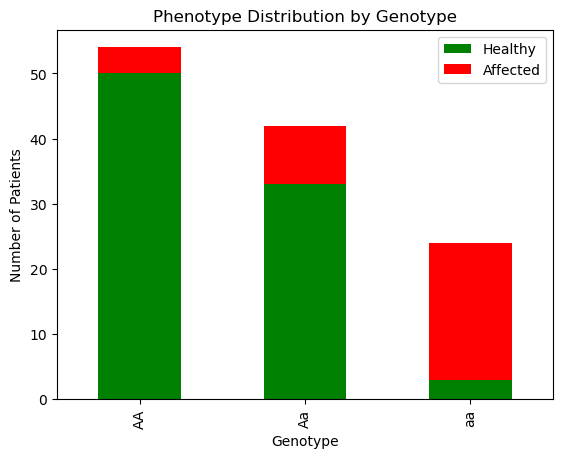

In [27]:
import matplotlib.pyplot as plt

# Count affected and healthy by genotype
genotype_counts = df.groupby(["Genotype", "Phenotype"]).size().unstack(fill_value=0)

# Plot
genotype_counts.plot(kind="bar", stacked=True, color=["green", "red"])
plt.title("Phenotype Distribution by Genotype")
plt.xlabel("Genotype")
plt.ylabel("Number of Patients")
plt.legend(["Healthy", "Affected"])
plt.show()


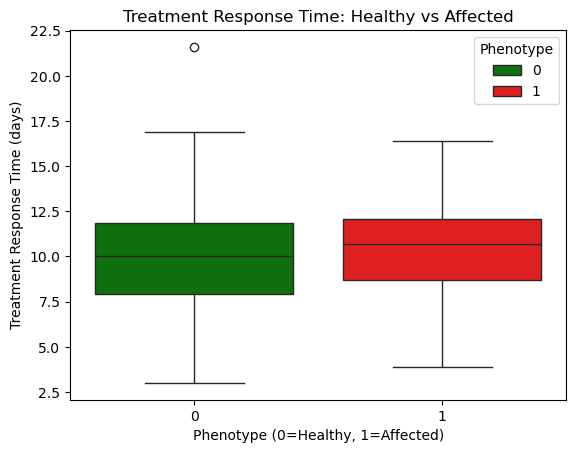

In [33]:
sns.boxplot(x="Phenotype", y="Treatment_Response_Time", hue="Phenotype", data=df, palette={0:"green", 1:"red"}, dodge=False)
plt.title("Treatment Response Time: Healthy vs Affected")
plt.xlabel("Phenotype (0=Healthy, 1=Affected)")
plt.ylabel("Treatment Response Time (days)")
plt.legend(title="Phenotype", loc="upper right")
plt.show()



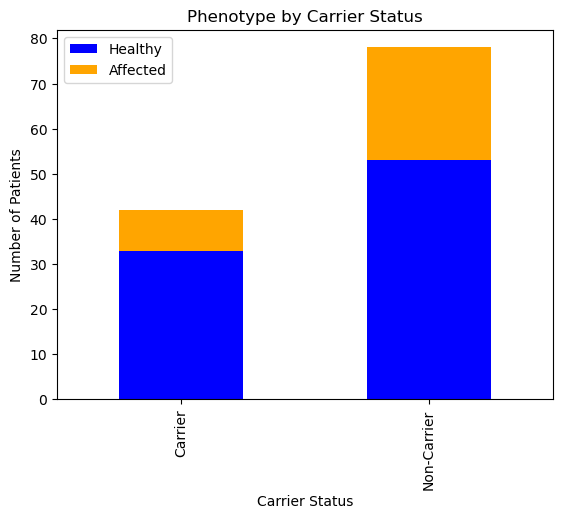

In [31]:
carrier_counts = df.groupby(["CarrierStatus", "Phenotype"]).size().unstack(fill_value=0)
carrier_counts.plot(kind="bar", stacked=True, color=["blue", "orange"])
plt.title("Phenotype by Carrier Status")
plt.xlabel("Carrier Status")
plt.ylabel("Number of Patients")
plt.legend(["Healthy", "Affected"])
plt.show()
